In [2]:
import pandas as pd
import numpy as np

import joblib
import graphviz
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv("Test_data_10k.csv")

In [4]:
dataset.drop(labels=['index'], axis=1, inplace=True)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Source Port                  10000 non-null  int64  
 1    Flow Duration                10000 non-null  int64  
 2    Total Fwd Packets            10000 non-null  int64  
 3    Total Backward Packets       10000 non-null  int64  
 4   Total Length of Fwd Packets   10000 non-null  int64  
 5    Total Length of Bwd Packets  10000 non-null  float64
 6    Fwd Packet Length Max        10000 non-null  int64  
 7    Fwd Packet Length Min        10000 non-null  int64  
 8    Fwd Packet Length Mean       10000 non-null  float64
 9    Fwd Packet Length Std        10000 non-null  float64
 10  Bwd Packet Length Max         10000 non-null  int64  
 11   Bwd Packet Length Min        10000 non-null  int64  
 12   Bwd Packet Length Mean       10000 non-null  float64
 13   B

In [6]:
#splitting the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(labels=[' Label'], axis=1),
    dataset[' Label'],
    test_size=0.3,
    random_state=None)

X_train.shape, X_test.shape

((7000, 67), (3000, 67))

Feature selection by examining training data set and applying that to the test set to avoid overfit
We apply correlation based feature selection through brute force approach

<AxesSubplot: >

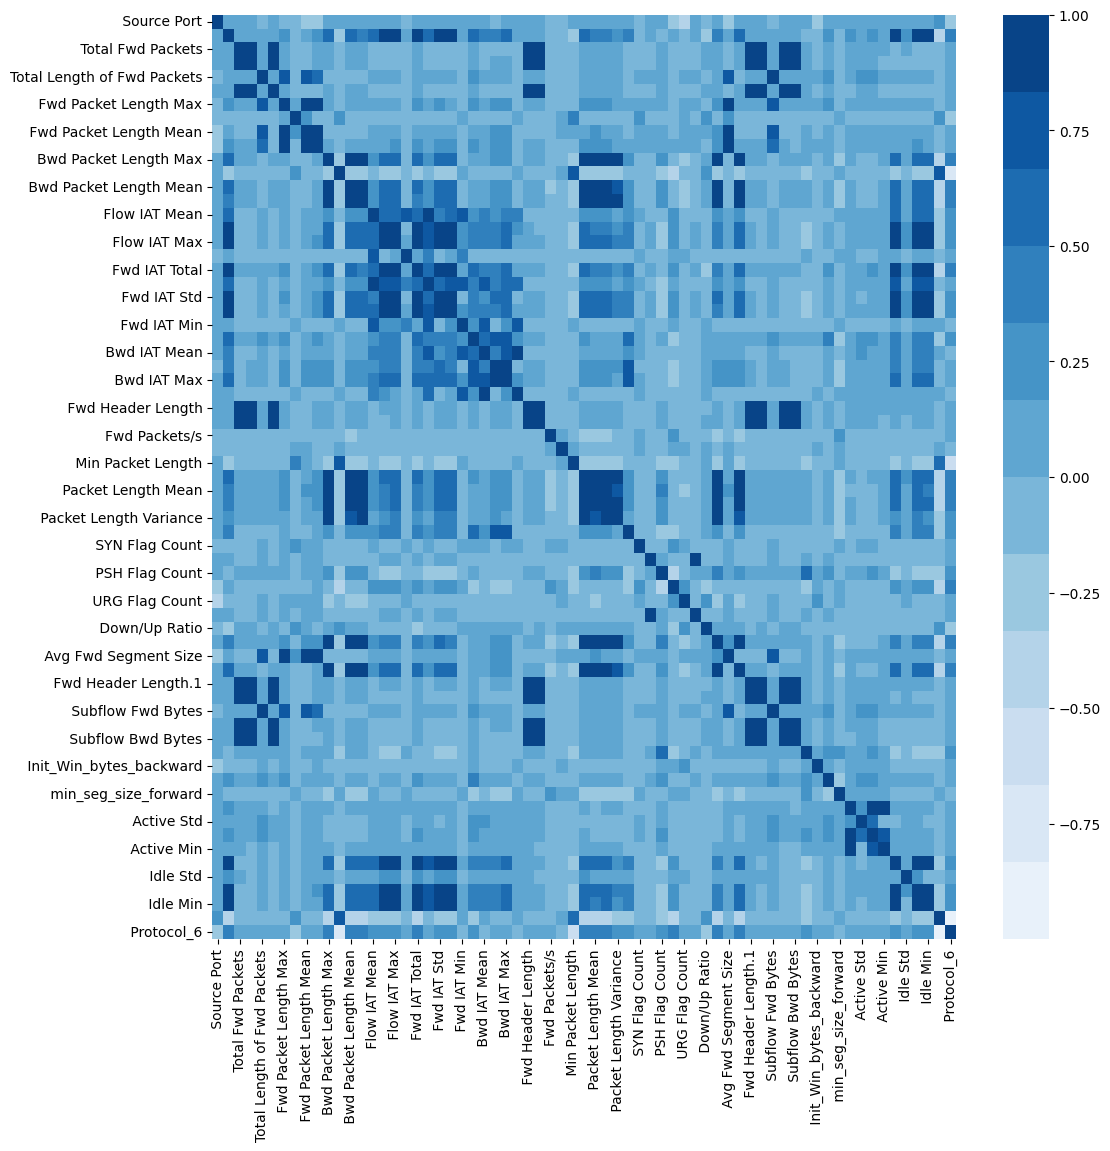

In [16]:
# cor_mat is the correlation matrix which examines the correlation of all features 
# (i.e. all feature combinations) and visualize using sns.heatmap because it tells the correlation
# of one feature to every other feature

cor_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
colormap = sns.color_palette("Blues",12)
sns.heatmap(cor_mat, cmap=colormap)

In [ ]:
#testing
cor_matrix.iloc[1, 0]


In [7]:
#Display correlation matrix
cor_matrix = dataset.corr()
cor_matrix

,Source Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
Source Port,1.000000,0.086127,0.003846,0.004354,-0.128767,0.003936,-0.162267,-0.023851,-0.189807,-0.168753,...,0.007669,0.008769,0.009603,0.082876,0.034021,0.086365,0.078488,0.193708,-0.192510,0.132461
Flow Duration,0.086127,1.000000,0.016655,0.013623,0.148034,0.005417,0.220303,-0.123094,0.093899,0.205205,...,0.162959,0.231672,0.132317,0.884710,0.243847,0.901025,0.852308,-0.338699,0.337608,0.359717
Total Fwd Packets,0.003846,0.016655,1.000000,0.999010,0.028866,0.999095,0.016855,-0.006815,0.000356,0.004167,...,0.020819,0.023354,0.005168,0.002230,0.001921,0.002536,0.001838,-0.017519,0.017220,-0.012207
Total Backward Packets,0.004354,0.013623,0.999010,1.000000,0.023660,0.999361,0.016999,-0.005259,0.000080,0.004028,...,0.008282,0.012417,0.003470,0.000205,-0.000602,0.000076,0.000207,-0.015212,0.015225,-0.014350
Total Length of Fwd Packets,-0.128767,0.148034,0.028866,0.023660,1.000000,0.012168,0.700138,-0.003025,0.720258,0.653140,...,0.241563,0.245326,0.048321,0.055646,0.090110,0.068193,0.042545,-0.101397,0.101478,-0.115193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Max,0.086365,0.901025,0.002536,0.000076,0.068193,0.000168,0.169220,-0.110784,0.086589,0.180255,...,0.019002,0.075656,0.105690,0.990218,0.225240,1.000000,0.962157,-0.301808,0.301789,0.477913
Idle Min,0.078488,0.852308,0.001838,0.000207,0.042545,0.000377,0.138191,-0.104235,0.053520,0.145788,...,-0.031000,0.031526,0.083581,0.990596,-0.047214,0.962157,1.000000,-0.284857,0.284972,0.459284
Protocol_17,0.193708,-0.338699,-0.017519,-0.015212,-0.101397,-0.011963,-0.148353,0.247734,-0.044504,-0.164639,...,-0.046182,-0.089616,-0.073778,-0.296033,-0.083925,-0.301808,-0.284857,1.000000,-0.999459,-0.569190
Protocol_6,-0.192510,0.337608,0.017220,0.015225,0.101478,0.011969,0.148464,-0.247566,0.044637,0.164729,...,0.042100,0.085032,0.073826,0.296070,0.083699,0.301789,0.284972,-0.999459,1.000000,0.569498


In [ ]:
#Observing the working of loop

for i in range(len(cor_matrix.columns)):
    for j in range(i):
        print(i,j)



In [8]:
#A function to select highly correlated features 

def Correlation(data, threshold):
    col_cor = set()   #set of all names of correlated columns
    #cor_matrix = dataset.corr() #returns the correlation of every signal feature with other features
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i, j]) > threshold: #Absolute coeff value is used
                colName = cor_matrix.columns[i]  #saving the names of correlated columns
                col_cor.add(colName)
    return col_cor
            

In [9]:
cor_features = Correlation(X_train, 0.9)
len(set(cor_features))

30

In [10]:
cor_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd Header Length',
 ' Bwd IAT Max',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Std',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Protocol_6',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 'Fwd IAT Total',
 'Idle Mean',
 'Subflow Fwd Packets'}

Here, 30 features are highly correlated with other features in the training set.

In [11]:
#Dropping the highly correlated features

X_train.drop(labels=cor_features, axis=1, inplace=True)
X_test.drop(labels=cor_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((7000, 37), (3000, 37))

In [12]:
InitialModel = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

hyperparameters = {
    'max_depth' : [i for i in range(1, 15)]
}

In [13]:
FinalModel = RandomizedSearchCV(
             InitialModel,
             param_distributions = hyperparameters,
             cv = 10,
             n_jobs = -1
            )


In [14]:
FinalModel.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14]})

In [15]:
print("Accuracy score on Validation set: \n")
print(FinalModel.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(FinalModel.best_params_)
print("---------------")
print(FinalModel.best_estimator_)

Accuracy score on Validation set: 

0.9917142857142858
---------------
Best performing hyperparameters on Validation set: 
{'max_depth': 14}
---------------
DecisionTreeClassifier(max_depth=14)


In [16]:
Validated_Model = FinalModel.best_estimator_

In [17]:
Validated_Model

DecisionTreeClassifier(max_depth=14)

In [18]:
predictions = Validated_Model.predict(X_test)

In [19]:
predictions

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [20]:
print(accuracy_score(y_test, predictions))

0.9916666666666667


In [21]:
con_mat = confusion_matrix(y_test, predictions)
print(con_mat)

[[1488   14]
 [  11 1487]]


<AxesSubplot: >

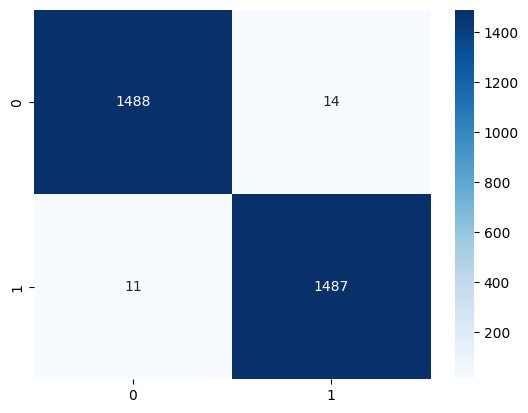

In [22]:
cmat = np.array([[1488,    14],[11,   1487]])

sns.heatmap(cmat, annot=True,fmt="d",cmap='Blues')

In [23]:
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9927    0.9907    0.9917      1502
           1     0.9907    0.9927    0.9917      1498

    accuracy                         0.9917      3000
   macro avg     0.9917    0.9917    0.9917      3000
weighted avg     0.9917    0.9917    0.9917      3000



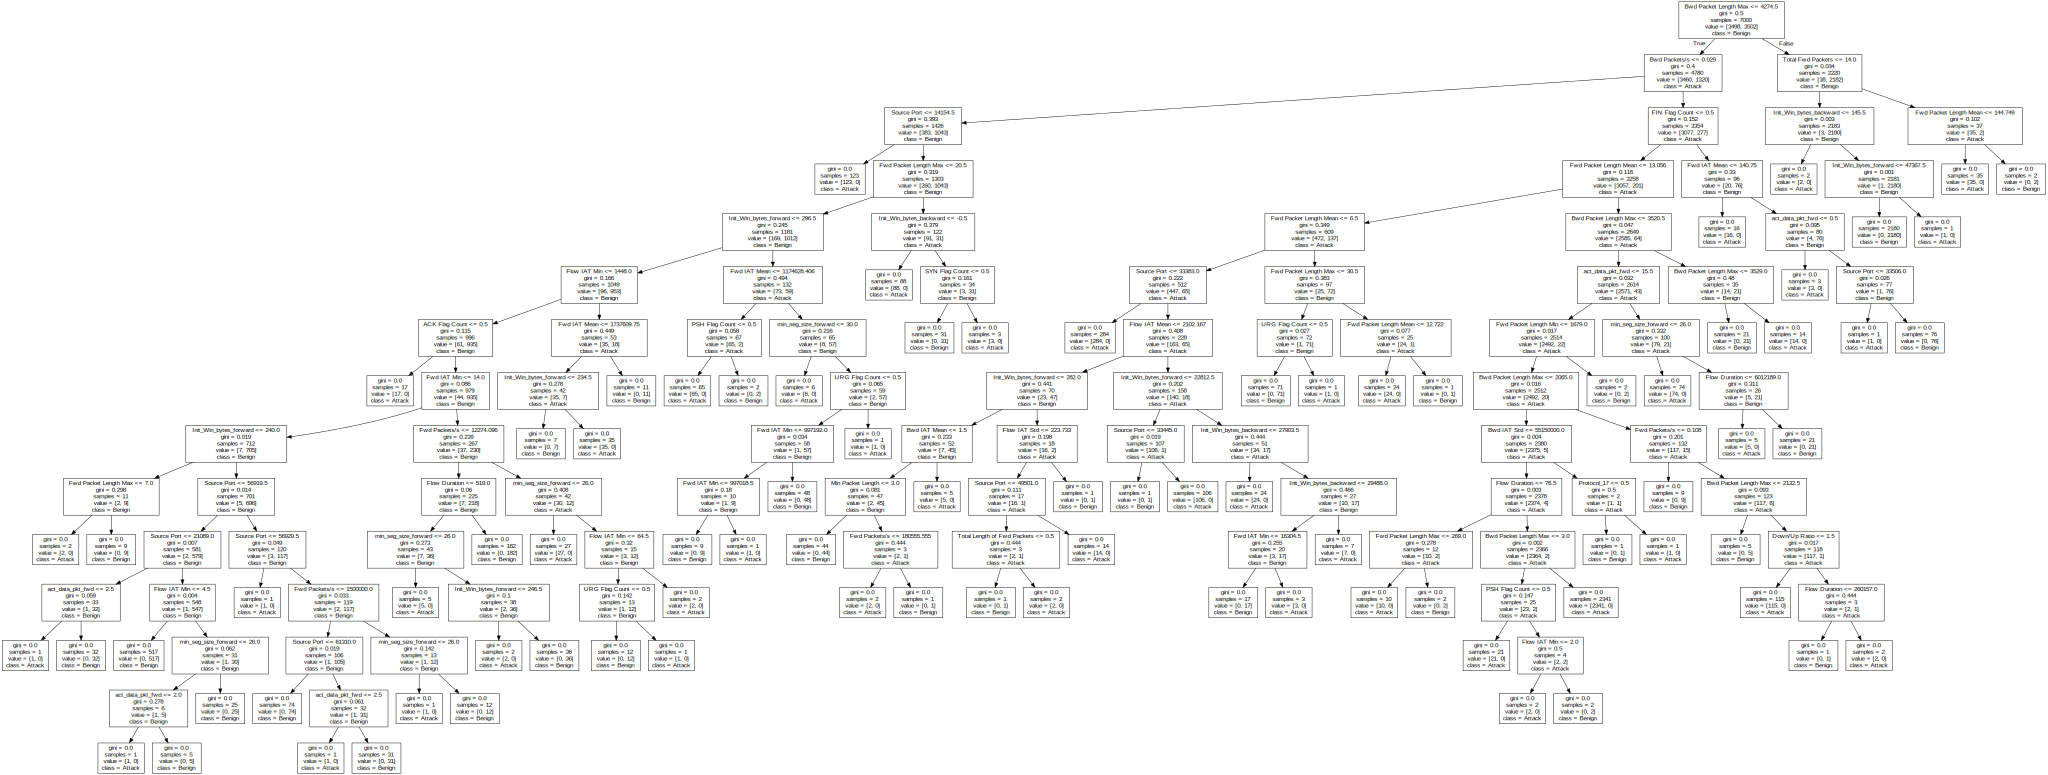

In [24]:
temp = dataset
temp.replace(to_replace = 0, value = "Benign", inplace = True)
temp.replace(to_replace = 1, value = "Attack", inplace = True)
dot_data = tree.export_graphviz(
    Validated_Model,
    out_file = None,
    class_names = temp[" Label"],
    feature_names = X_train.columns
)

graphviz.Source(dot_data, format="png")

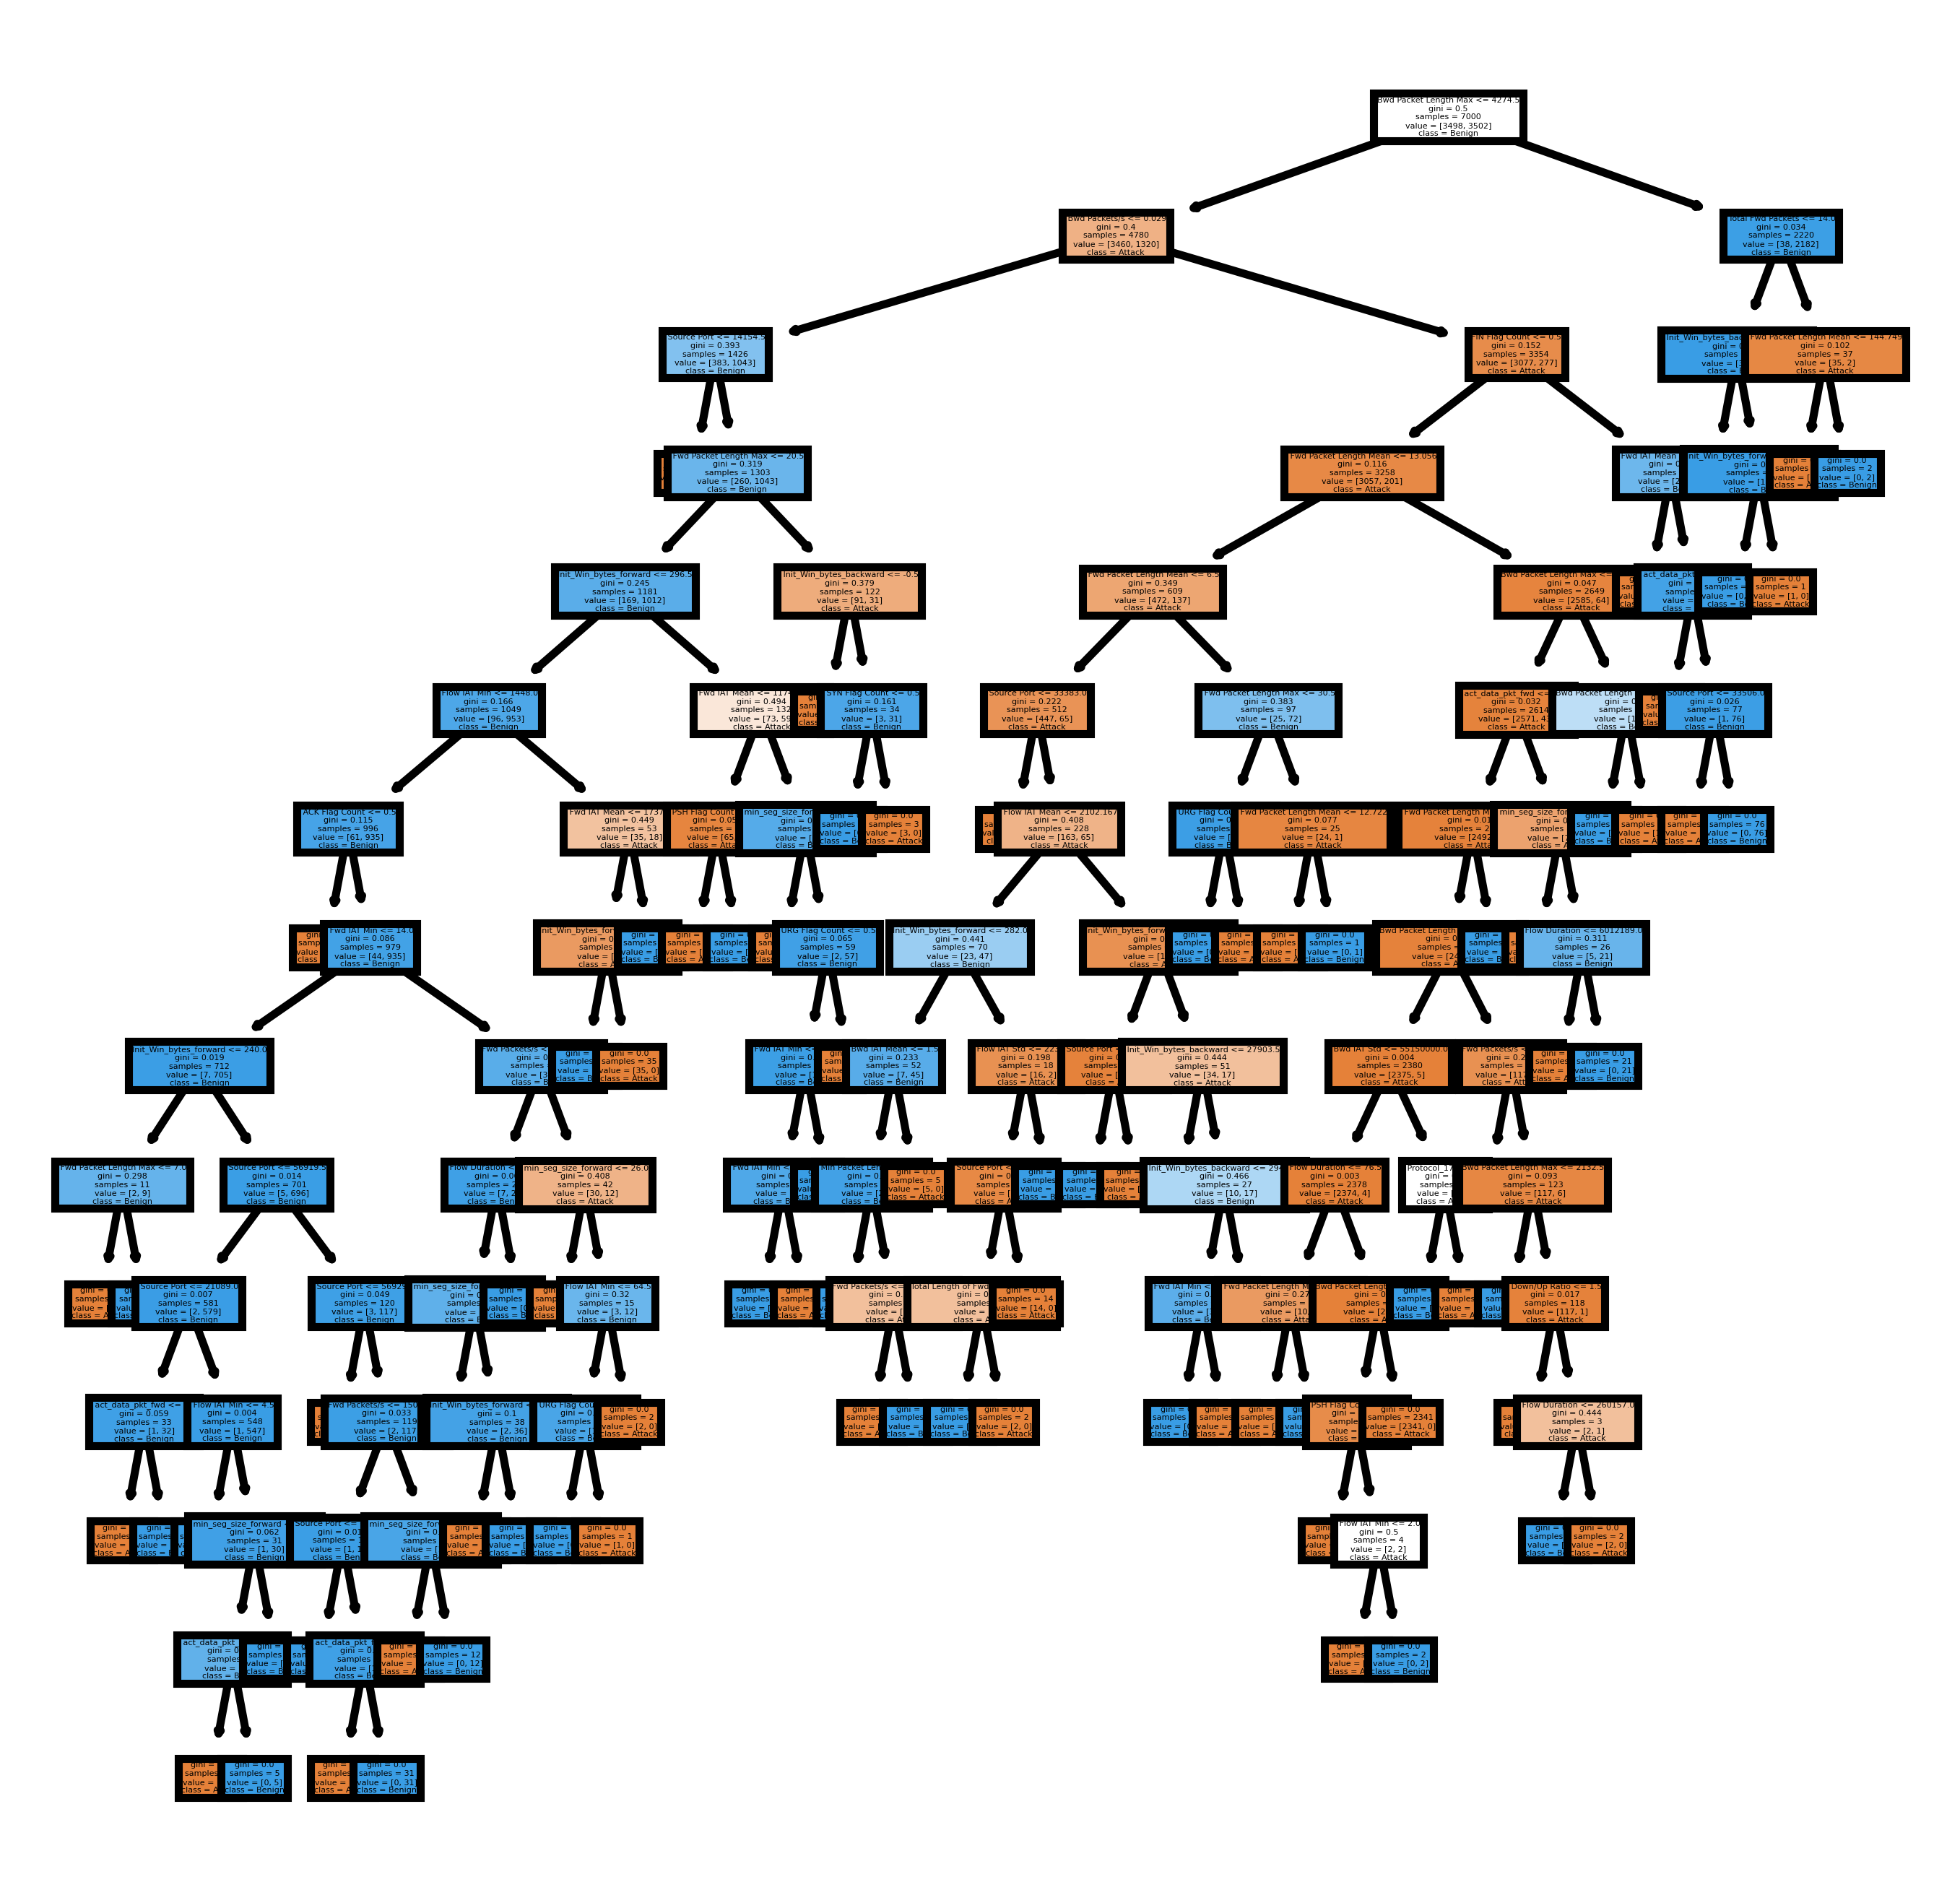

In [25]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(Validated_Model,
               feature_names = X_train.columns, 
               class_names=temp[" Label"],
               filled = True);
fig.savefig('FinalDecisionTree.png')